# Notebook Imports and Packages

In [50]:
#imports
import matplotlib.pyplot as plt
import numpy as np
import math

from matplotlib import cm #Color map
from mpl_toolkits.mplot3d.axes3d import Axes3D

from sympy import symbols, diff

from sklearn.linear_model import LinearRegression

%matplotlib inline

# Example 1 - A simple cost function
## $f(x) = x^2 + x + 1$

In [2]:
def f(x): 
    return x**2 + x + 1

In [3]:
x_1 = np.linspace(start=-3,stop=3, num=100)

In [4]:
x_1

array([-3.        , -2.93939394, -2.87878788, -2.81818182, -2.75757576,
       -2.6969697 , -2.63636364, -2.57575758, -2.51515152, -2.45454545,
       -2.39393939, -2.33333333, -2.27272727, -2.21212121, -2.15151515,
       -2.09090909, -2.03030303, -1.96969697, -1.90909091, -1.84848485,
       -1.78787879, -1.72727273, -1.66666667, -1.60606061, -1.54545455,
       -1.48484848, -1.42424242, -1.36363636, -1.3030303 , -1.24242424,
       -1.18181818, -1.12121212, -1.06060606, -1.        , -0.93939394,
       -0.87878788, -0.81818182, -0.75757576, -0.6969697 , -0.63636364,
       -0.57575758, -0.51515152, -0.45454545, -0.39393939, -0.33333333,
       -0.27272727, -0.21212121, -0.15151515, -0.09090909, -0.03030303,
        0.03030303,  0.09090909,  0.15151515,  0.21212121,  0.27272727,
        0.33333333,  0.39393939,  0.45454545,  0.51515152,  0.57575758,
        0.63636364,  0.6969697 ,  0.75757576,  0.81818182,  0.87878788,
        0.93939394,  1.        ,  1.06060606,  1.12121212,  1.18

Text(0, 0.5, 'f(x)')

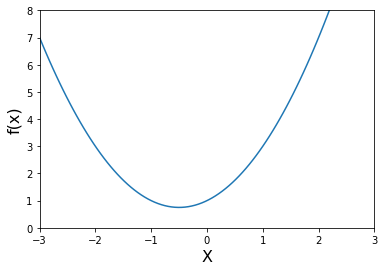

In [5]:
plt.plot(x_1, f(x_1))
plt.xlim([-3,3])
plt.ylim([0,8])
plt.xlabel("X", fontsize=16)
plt.ylabel("f(x)", fontsize=16)

## Slope & Derivatives

In [6]:
def df(x):
    return 2*x + 1

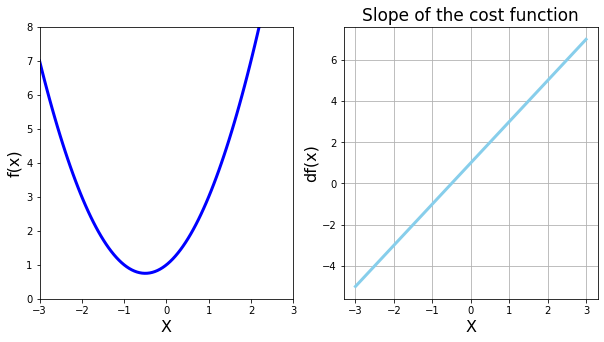

In [7]:
# Plot function and derivative side by side

plt.figure(figsize=[10,5])

plt.subplot(1, 2, 1)

# 1 Chart: Cost Function
plt.plot(x_1, f(x_1), color="blue", linewidth=3)
plt.xlim([-3,3])
plt.ylim([0,8])
plt.xlabel("X", fontsize=16)
plt.ylabel("f(x)", fontsize=16)

# 2 Chart: Derivative
plt.subplot(1, 2, 2)

plt.plot(x_1, df(x_1), color="skyblue", linewidth=3)
plt.xlabel("X", fontsize=16)
plt.ylabel("df(x)", fontsize=16)
plt.title("Slope of the cost function", fontsize=17)
plt.grid()

# Python Loops & Gradient Descent

In [8]:
new_x = 3
step_multiplier = 0.1
x_list = []
slope_list = []
for n in range(30):
    x_list.append(new_x)
    gradient = df(new_x)
    slope_list.append(gradient)
    new_x = new_x - step_multiplier * gradient

print("Local minimum is at: {}".format(new_x))
print("Slope of df(x) value at this point is: {}".format(df(new_x)))
print("f(x) value or cost at this point is: {}".format(f(new_x)))

Local minimum is at: -0.4956672098625011
Slope of df(x) value at this point is: 0.008665580274997753
f(x) value or cost at this point is: 0.7500187730703756


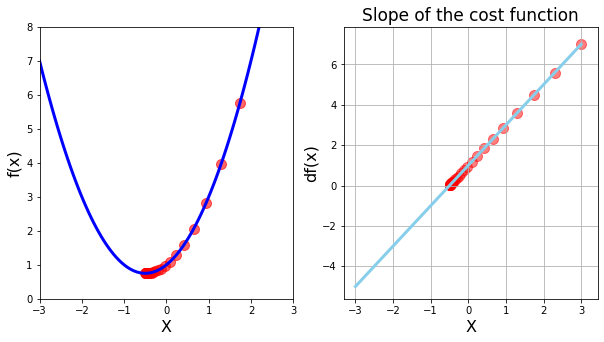

In [9]:
# Plot function and derivative side by side

plt.figure(figsize=[10,5])

plt.subplot(1, 2, 1)

# 1 Chart: Cost Function
plt.plot(x_1, f(x_1), color="blue", linewidth=3)
plt.xlim([-3,3])
plt.ylim([0,8])
plt.xlabel("X", fontsize=16)
plt.ylabel("f(x)", fontsize=16)

values = np.array(x_list)
plt.scatter(x_list, f(values), color="red", s=100, alpha=0.6)
# 2 Chart: Derivative
plt.subplot(1, 2, 2)

plt.plot(x_1, df(x_1), color="skyblue", linewidth=3)
plt.xlabel("X", fontsize=16)
plt.ylabel("df(x)", fontsize=16)
plt.title("Slope of the cost function", fontsize=17)
plt.scatter(x_list, slope_list, color="red", s=100, alpha=0.5)
plt.grid()

# Example 2 - Multiple Minima vs Initial Guess & Advanced Functions

## $$g(x) = x^4 - 4x^2 + 5$$

In [10]:
# Make some data
x_2 = np.linspace(-2,2,1000)

# Challenge: Write the g(x) function and the dg(X) function in Python

def g(x): 
    return x**4 - 4*x**2 + 5
def dg(x):
    return 4*x**3 - 8*x

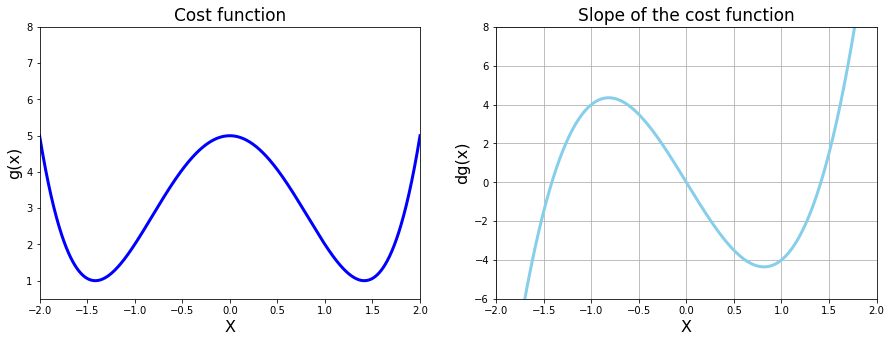

In [11]:
# Plot function and derivative side by side

plt.figure(figsize=[15,5])

plt.subplot(1, 2, 1)

# 1 Chart: Cost Function
plt.plot(x_2, g(x_2), color="blue", linewidth=3)
plt.xlim([-2,2])
plt.ylim([0.5,8])
plt.title("Cost function", fontsize=17)
plt.xlabel("X", fontsize=16)
plt.ylabel("g(x)", fontsize=16)

values = np.array(x_list)
#plt.scatter(x_list, f(values), color="red", s=100, alpha=0.6)
# 2 Chart: Derivative
plt.subplot(1, 2, 2)
plt.plot(x_2, dg(x_2), color="skyblue", linewidth=3)
plt.xlabel("X", fontsize=16)
plt.ylabel("dg(x)", fontsize=16)
plt.xlim([-2,2])
plt.ylim([-6,8])
plt.title("Slope of the cost function", fontsize=17)
#plt.scatter(x_list, slope_list, color="red", s=100, alpha=0.5)
plt.grid()

In [12]:
# Gradient Descent
def gradient_descent(derivative_func, initial_guess,multiplier=0.02, precision=0.001, max_iter=300):
    new_x = initial_guess
    previous_x = 0
    x_list = []
    slope_list = []
    for n in range(max_iter):
        previous_x = new_x
        gradient = derivative_func(previous_x)
        new_x = previous_x - multiplier * gradient
        x_list.append(new_x)
        slope_list.append(derivative_func(new_x))
        
        step_size = abs(new_x - previous_x)
        # print(step_size)
        if step_size < precision:
            #print("Loop ran this many times: {}".format(n))
            break

    #print("Local minimum is at: {}".format(new_x))
    #print("Slope of df(x) value at this point is: {}".format(df(new_x)))
    #print("f(x) value or cost at this point is: {}".format(f(new_x)))
    return new_x, x_list, slope_list

In [13]:
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg,initial_guess=0,multiplier=0.02, precision=0.001)

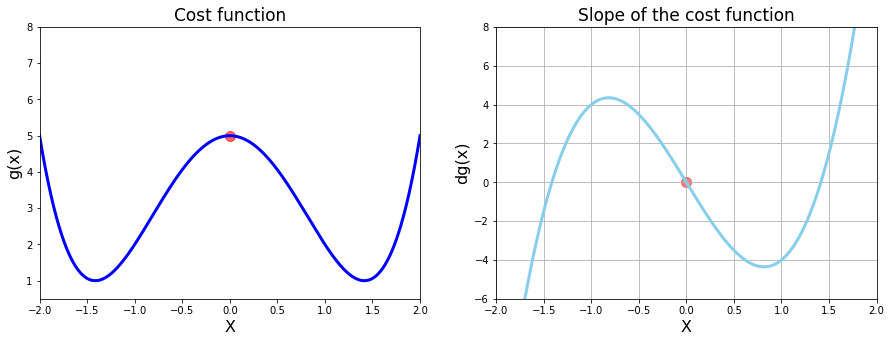

In [14]:
# Plot function and derivative side by side

plt.figure(figsize=[15,5])

plt.subplot(1, 2, 1)

# 1 Chart: Cost Function
plt.plot(x_2, g(x_2), color="blue", linewidth=3)
plt.xlim([-2,2])
plt.ylim([0.5,8])
plt.title("Cost function", fontsize=17)
plt.xlabel("X", fontsize=16)
plt.ylabel("g(x)", fontsize=16)

values = np.array(x_list)
plt.scatter(list_x, g(np.array(list_x)), color="red", s=100, alpha=0.6)
# 2 Chart: Derivative
plt.subplot(1, 2, 2)
plt.plot(x_2, dg(x_2), color="skyblue", linewidth=3)
plt.xlabel("X", fontsize=16)
plt.ylabel("dg(x)", fontsize=16)
plt.xlim([-2,2])
plt.ylim([-6,8])
plt.title("Slope of the cost function", fontsize=17)
plt.scatter(list_x, deriv_list, color="red", s=100, alpha=0.5)
plt.grid()

# Example 3 - Divergence, Overflow and Python Tuples
## $$ h(x) = x^5 - 2x^4 + 2$$

In [15]:
# Make data
x_3 = np.linspace(start=-2.5, stop=2.5,num=1000)

def h(x):
    return x**5 - 2*x**4 + 2

def dh(x): 
    return 5*x**4 - 8*x**3

Local min occurst at: -2071072.4470816324
Cost at this minimum is: -3.810455326061589e+31
Number of steps: 70


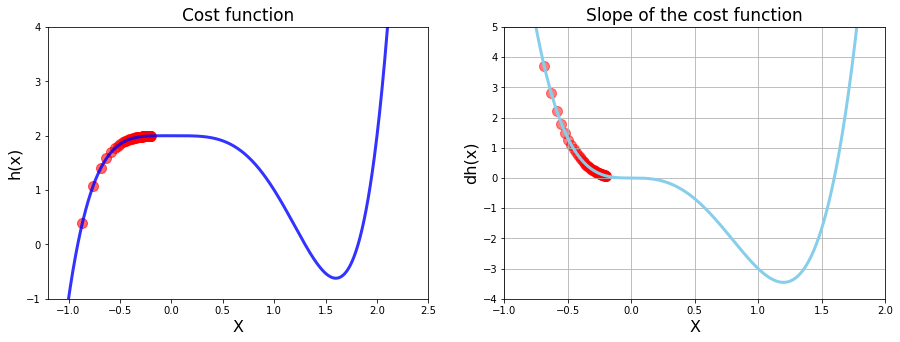

In [16]:
# Plot function and derivative side by side
local_min, list_x, deriv_list = gradient_descent(derivative_func=dh,initial_guess=-0.2, max_iter=70)
plt.figure(figsize=[15,5])

plt.subplot(1, 2, 1)
# 1 Chart: Cost Function
plt.plot(x_3, h(x_3), color="blue", linewidth=3, alpha=0.8)
plt.xlim([-1.2,2.5])
plt.ylim([-1,4])
plt.title("Cost function", fontsize=17)
plt.xlabel("X", fontsize=16)
plt.ylabel("h(x)", fontsize=16)

#values = np.array(list_x)
plt.scatter(list_x, h(np.array(list_x)), color="red", s=100, alpha=0.6)
# 2 Chart: Derivative
plt.subplot(1, 2, 2)
plt.plot(x_3, dh(x_3), color="skyblue", linewidth=3)
plt.xlabel("X", fontsize=16)
plt.ylabel("dh(x)", fontsize=16)
plt.xlim([-1,2])
plt.ylim([-4,5])
plt.title("Slope of the cost function", fontsize=17)
plt.scatter(list_x, deriv_list, color="red", s=100, alpha=0.5)
plt.grid()

print("Local min occurst at: {}".format(local_min))
print("Cost at this minimum is: {}".format(h(local_min)))
print("Number of steps: {}".format(len(list_x)))

In [17]:
import sys
#help(sys)
type(h(local_min))
sys.float_info.max

1.7976931348623157e+308

# Python Tuples

In [18]:
# Creating a tuple
breakfast = "bacon","eggs","avocado"
unlucky_numbers = 13,4,9,26,17

print("I love {}".format(breakfast[0]))

I love bacon


In [19]:
tuple_with_single_value=1,
type(tuple_with_single_value)

tuple

# The Learning Rate

Number of steps is: 500


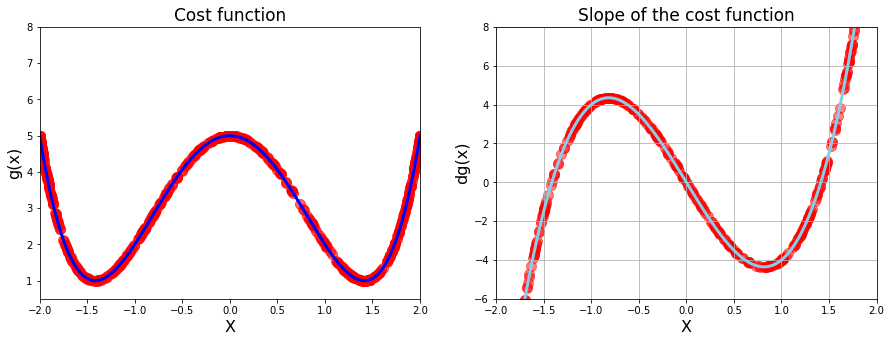

In [20]:
# Plot function and derivative side by side
local_min, list_x, deriv_list = gradient_descent(derivative_func=dg,initial_guess=1.9, multiplier=0.25, max_iter=500)

plt.figure(figsize=[15,5])

plt.subplot(1, 2, 1)

# 1 Chart: Cost Function
plt.plot(x_2, g(x_2), color="blue", linewidth=3)
plt.xlim([-2,2])
plt.ylim([0.5,8])
plt.title("Cost function", fontsize=17)
plt.xlabel("X", fontsize=16)
plt.ylabel("g(x)", fontsize=16)

values = np.array(list_x)
plt.scatter(list_x, g(values), color="red", s=100, alpha=0.6)
# 2 Chart: Derivative
plt.subplot(1, 2, 2)
plt.plot(x_2, dg(x_2), color="skyblue", linewidth=3)
plt.xlabel("X", fontsize=16)
plt.ylabel("dg(x)", fontsize=16)
plt.xlim([-2,2])
plt.ylim([-6,8])
plt.title("Slope of the cost function", fontsize=17)
plt.scatter(list_x, deriv_list, color="red", s=100, alpha=0.5)
plt.grid()

print("Number of steps is: {}".format(len(list_x)))

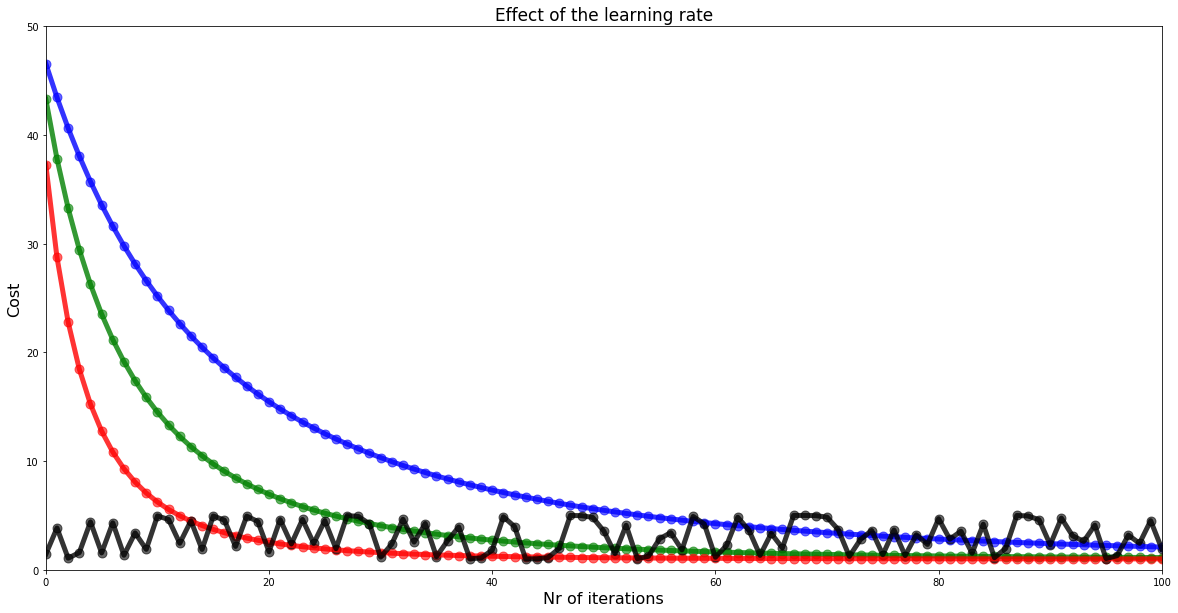

In [21]:
# Run gradient descent 3 times
n = 100
low_gamma = gradient_descent(derivative_func=dg, initial_guess=3, multiplier=0.0005, precision=0.0001, max_iter=n+1)
medium_gamma = gradient_descent(derivative_func=dg, initial_guess=3, multiplier=0.001, precision=0.0001, max_iter=n+1)
high_gamma = gradient_descent(derivative_func=dg, initial_guess=3, multiplier=0.002, precision=0.0001, max_iter=n+1)

experiment = gradient_descent(derivative_func=dg, initial_guess=1.9, multiplier=0.25, precision=0.0001, max_iter=n+1)


# Plotting reduction in cost for each iteration
plt.figure(figsize=[20,10])

plt.xlim(0,n)
plt.ylim(0,50)

plt.title("Effect of the learning rate", fontsize=17)
plt.xlabel("Nr of iterations", fontsize=16)
plt.ylabel("Cost", fontsize=16)

# Values for our charts
# 1) Y Axis Data: convert the lists to numpy arrays
low_values = np.array(low_gamma[1])

# 2) X Axis data: create a list from 0 to n+1
iteration_list = list(range(0,n+1))

# Low learning rate
plt.plot(iteration_list, g(low_values), color="blue", linewidth=5, alpha=0.8)
plt.scatter(iteration_list, g(low_values), color="blue", s=80, alpha=0.6)

# Mid learning rate
plt.plot(iteration_list, g(np.array(medium_gamma[1])), color="green", linewidth=5, alpha=0.8)
plt.scatter(iteration_list, g(np.array(medium_gamma[1])), color="green", s=80, alpha=0.6)

# High learning rate
plt.plot(iteration_list, g(np.array(high_gamma[1])), color="red", linewidth=5, alpha=0.8)
plt.scatter(iteration_list, g(np.array(high_gamma[1])), color="red", s=80, alpha=0.6)

# Experiment
plt.plot(iteration_list, g(np.array(experiment[1])), color="black", linewidth=5, alpha=0.8)
plt.scatter(iteration_list, g(np.array(experiment[1])), color="black", s=80, alpha=0.6)

# Example 4 - Data Viz with 3D Charts

## Minimize $$f(x,y) = \frac{1}{3^{-x^2 - y^2} + 1}$$

or 

$$f(x,y) = \frac{1}{r + 1}$$ where $r$ is $3^{-x^2 - y^2}$

In [22]:
def f(x,y):
    r = 3**(-x**2 - y**2)
    return 1/(1+r)

In [23]:
# Make our x and y data
x_4 = np.linspace(start=-2, stop=2, num=200)
y_4 = np.linspace(start=-2, stop=2, num=200)

x_4,y_4 = np.meshgrid(x_4,y_4)

print("Shape of x array: {}".format(x_4.shape))

Shape of x array: (200, 200)


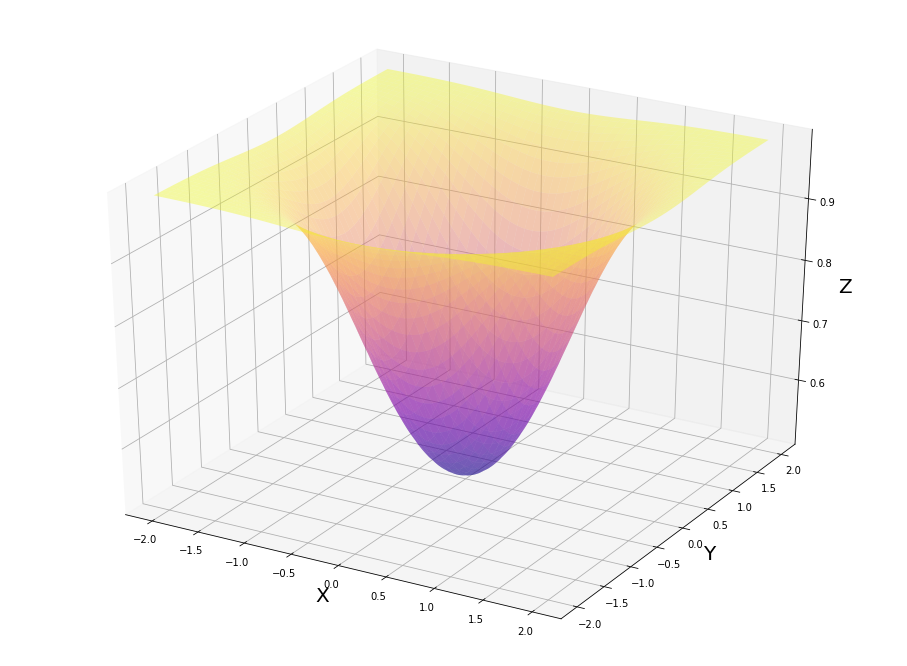

In [24]:
# Generating 3D plot
fig = plt.figure(figsize=[16,12])
ax = fig.gca(projection="3d")#GCA = get current axis

ax.set_xlabel("X", fontsize=20)
ax.set_ylabel("Y", fontsize=20)
ax.set_zlabel("Z", fontsize=20)

ax.plot_surface(x_4,y_4, f(x_4,y_4), cmap=cm.plasma, alpha= 0.4)
plt.show()

# Partial derivatives and symbolic computation

In [25]:
a, b = symbols("x,y")
print("Our cost function f(x,y) is: {}".format(f(a,b)))

Our cost function f(x,y) is: 1/(3**(-x**2 - y**2) + 1)


In [26]:
diff(f(a,b),a)

2*3**(-x**2 - y**2)*x*log(3)/(3**(-x**2 - y**2) + 1)**2

In [27]:
f(a,b).evalf(subs={a:1.8, b:1.0})

0.990604794032582

## Batch Gradient Descent with Sympy

In [28]:
# Setup
multiplier = 0.1
max_iter = 500
params = np.array([1.8,1.0])# initial guess for x and y

for n in range(max_iter):
    gradient_x = diff(f(a,b),a).evalf(subs={a:params[0],b:params[1]})
    gradient_y = diff(f(a,b),b).evalf(subs={a:params[0],b:params[1]})
    gradients = np.array([gradient_x,gradient_y])
    params = params - multiplier*gradients
    
# Results
print("Values in gradient array: {}".format(gradients))
print("Minimum occurs at x value of: {}".format(params[0]))
print("Y: {}".format(params[1]))

print("The cost is: {}".format(f(params[0],params[1])))

Values in gradient array: [2.01013037525579e-11 1.11673909736433e-11]
Minimum occurs at x value of: 3.45838599885832E-11
Y: 1.92132555492129E-11
The cost is: 0.500000000000000


## Partial Derivatives
## $$\frac{\partial f}{\partial x} = \frac{2x \ln(3) \cdot 3^{-x^2 - y^2}}{\left(3^{-x^2 - y^2} + 1\right)^2}$$
## $$\frac{\partial f}{\partial y} = \frac{2y \ln(3) \cdot 3^{-x^2 - y^2}}{\left(3^{-x^2 - y^2} + 1\right)^2}$$

In [29]:
def fpx(x,y):
    simp = 3**(-x**2 - y**2)
    top = 2*x*math.log(3) * simp
    bottom = (simp + 1)**2
    return top/bottom

In [30]:
def fpy(x,y):
    simp = 3**(-x**2 - y**2)
    top = 2*y*math.log(3) * simp
    bottom = (simp + 1)**2
    return top/bottom

In [31]:
fpx(1.8,1.0)

0.036808971619750504

In [32]:
# Setup
multiplier = 0.1
max_iter = 1000
params = np.array([1.8,1.0])# initial guess for x and y

for n in range(max_iter):
    gradient_x = fpx(params[0],params[1])
    gradient_y = fpy(params[0],params[1])
    gradients = np.array([gradient_x,gradient_y])
    params = params - multiplier*gradients
    
# Results
print("Values in gradient array: {}".format(gradients))
print("Minimum occurs at x value of: {}".format(params[0]))
print("Y: {}".format(params[1]))

print("The cost is: {}".format(f(params[0],params[1])))

Values in gradient array: [1.08410585e-23 6.02281029e-24]
Minimum occurs at x value of: 1.865180758685096e-23
Y: 1.0362115326028303e-23
The cost is: 0.5


## Graphin 3D Gradient Descent & Adb Numpy Arrays

In [33]:
# Setup
multiplier = 0.1
max_iter = 100
params = np.array([1.8,1.0])# initial guess for x and y
values_array = params.reshape(1,2) #rows, columns
print(values_array.shape)

for n in range(max_iter):
    gradient_x = diff(f(a,b),a).evalf(subs={a:params[0],b:params[1]})
    gradient_y = diff(f(a,b),b).evalf(subs={a:params[0],b:params[1]})
    gradients = np.array([gradient_x,gradient_y])
    params = params - multiplier*gradients
    
# Results
print("Values in gradient array: {}".format(gradients))
print("Minimum occurs at x value of: {}".format(params[0]))
print("Y: {}".format(params[1]))

print("The cost is: {}".format(f(params[0],params[1])))

(1, 2)
Values in gradient array: [0.130860816249074 0.0727004534717078]
Minimum occurs at x value of: 0.225542606341772
Y: 0.125301447967651
The cost is: 0.518275488025232


In [34]:
# Advanced Numpy Array Practice: 
kirk = np.array([["Captain","Guitar"]])
print(kirk.shape)

(1, 2)


In [35]:
hs_band = np.array([["Black Thought", "MC"], ["Questlove","Drums"]])
print(hs_band.shape)

(2, 2)


In [36]:
the_roots = np.append(arr=hs_band, values=kirk, axis=0)
print(the_roots)

[['Black Thought' 'MC']
 ['Questlove' 'Drums']
 ['Captain' 'Guitar']]


In [37]:
print("Nicknames: {}".format(the_roots[:, 0]))
print("Instruments:{}".format(the_roots[:,1]))

Nicknames: ['Black Thought' 'Questlove' 'Captain']
Instruments:['MC' 'Drums' 'Guitar']


In [48]:
# Setup
multiplier = 0.1
max_iter = 500
params = np.array([1.8,1.0])# initial guess for x and y
values_array = params.reshape(1,2) #rows, columns
print(values_array.shape)

for n in range(max_iter):
    gradient_x = diff(f(a,b),a).evalf(subs={a:params[0],b:params[1]})
    gradient_y = diff(f(a,b),b).evalf(subs={a:params[0],b:params[1]})
    gradients = np.array([gradient_x,gradient_y])
    params = params - multiplier*gradients
    #values_array = np.append(values_array, params.reshape(1,2), axis=0)
    values_array = np.concatenate((values_array, params.reshape(1,2)), axis=0)
    
# Results
print("Values in gradient array: {}".format(gradients))
print("Minimum occurs at x value of: {}".format(params[0]))
print("Y: {}".format(params[1]))

print("The cost is: {}".format(f(params[0],params[1])))

(1, 2)
Values in gradient array: [2.01013037525579e-11 1.11673909736433e-11]
Minimum occurs at x value of: 3.45838599885832E-11
Y: 1.92132555492129E-11
The cost is: 0.500000000000000


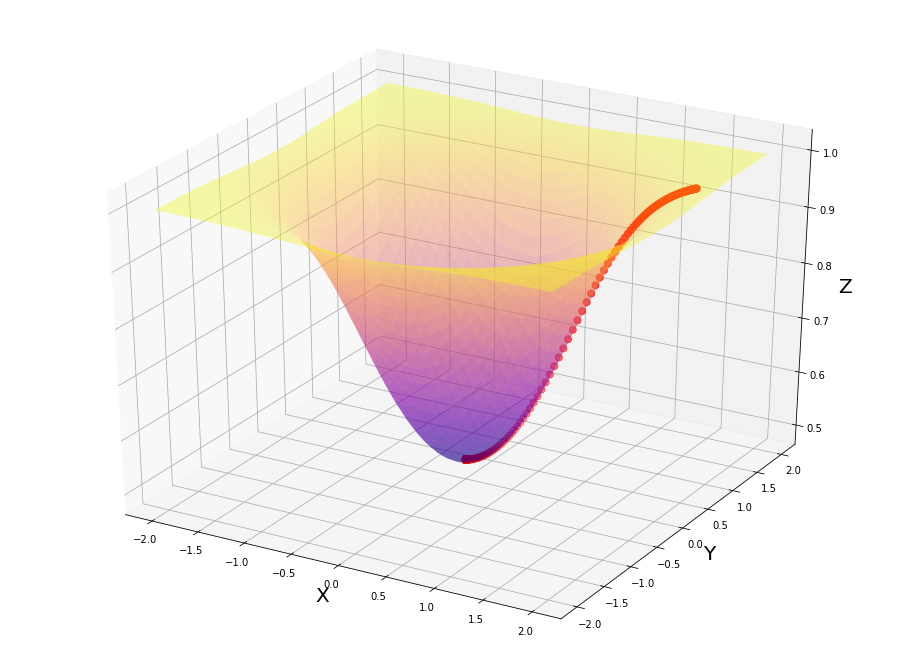

In [46]:
# Generating 3D plot
fig = plt.figure(figsize=[16,12])
ax = fig.gca(projection="3d")#GCA = get current axis

ax.set_xlabel("X", fontsize=20)
ax.set_ylabel("Y", fontsize=20)
ax.set_zlabel("Z", fontsize=20)

my_x = [float(i) for i in values_array[:,0]]
my_y = [float(i) for i in values_array[:,1]]
my_z = [float(i) for i in f(values_array[:,0],values_array[:,1])]#This had to be done due to some reason in which
#Python does not recognize the values correctly, which causes issues with the function, and the scatter function.
# Thanks to stackoverflow: https://stackoverflow.com/questions/62029284/matplotlib-pyplot-error-in-scatter-function-using-axis
ax.plot_surface(x_4,y_4, f(x_4,y_4), cmap=cm.plasma, alpha= 0.4)
ax.scatter(my_x,my_y, my_z, s=50, color="red")
plt.show()

# Example 5 - Working with Data & a Real Cost Function
## Mean Squared Error (MSE)
Basically, it is the Residual Sum of Squares, but over the number of points. Something like RSS/n

### $$ RSS = \sum_{i=1}^{n} \big( y^{(i)} - h_\theta x^{(i)}\big)^2$$
### $$ MSE = \frac{1}{n} \sum_{i=1}^{n} \big( y^{(i)} - h_\theta x^{(i)}\big)^2$$

In [49]:
# Make sample data
x_5 = np.array([0.1,1.2,2.4,3.2,4.1,5.7,6.5])
y_5 = np.array([1.7, 2.4, 3.5, 3.0, 6.1, 9.4, 8.2])

print(x_5.shape)
print(y_5.shape)

(7,)
(7,)


In [51]:
# Quick linear regression
regr = LinearRegression()
regr.fit(x_5,y_5)

ValueError: Expected 2D array, got 1D array instead:
array=[0.1 1.2 2.4 3.2 4.1 5.7 6.5].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.